<a href="https://colab.research.google.com/github/Aaaaaamz/Clustering/blob/main/Clustering_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTERING IMPLEMENTATION**

Importig required Libraries

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

Importing dataset

In [5]:
dataset = pd.read_csv('income.csv')

Reading the given data and fragmenting

we can read hed data also i have read tail data

In [6]:
df = pd.read_csv("income.csv")
df.tail()

,Name,Age,Income($)
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


visualising data

Text(0, 0.5, 'Income($)')

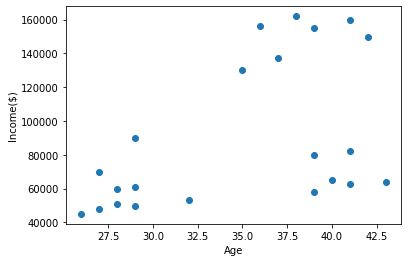

In [7]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

we can three clusters clearly

so we use k means for this clusters

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

here we can see three data 0,1,2

Adding the clusters into data fragment and printing tail part

In [9]:
df['cluster']=y_predicted
df.tail()

,Name,Age,Income($),cluster
17,Priyanka,41,63000,0
18,Nick,43,64000,0
19,Alia,39,80000,2
20,Sid,41,82000,2
21,Abdul,39,58000,0


Locating clusters centroid

In [10]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

visualising the model by adding all the clusters in three data frames and plotting  age vs income and plotting three colours using RGB colour and plotting centroid also

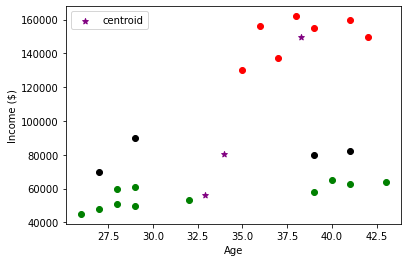

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

here we can see two clusters are not proper so we need to scale the values

scalling the features

**Reprocessing using min max scaler**

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


now we can se income and age is scaled  between 0 to 1

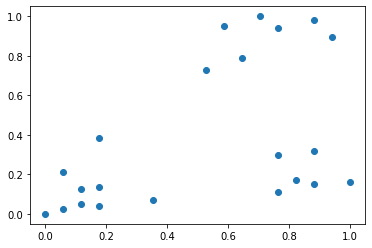

In [14]:
plt.scatter(df.Age,df['Income($)'])

adding new clusters to data fragments

In [24]:
df['cluster']=y_predicted
df.tail()

,Name,Age,Income($),cluster
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2
19,Alia,0.764706,0.299145,2
20,Sid,0.882353,0.316239,2
21,Abdul,0.764706,0.111111,2


**Visualising the data again after scallling**

In [25]:

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

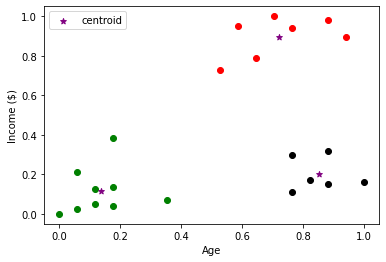

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()


here we can see proper clusters

In [16]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)


assigning k from 1 t 10 and calculating error

In [17]:
km.cluster_centers_

array([[0.35294118, 0.06837607],
       [0.68627451, 0.96296296],
       [0.86764706, 0.14957265],
       [0.14705882, 0.08867521],
       [0.91176471, 0.94017094],
       [0.58823529, 0.75641026],
       [0.02941176, 0.01282051],
       [0.11764706, 0.2991453 ],
       [0.82352941, 0.30769231]])

Plotting the error

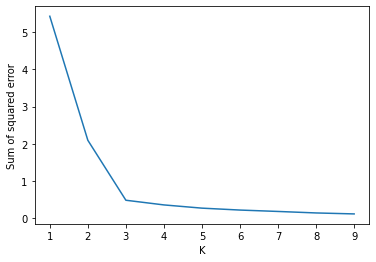

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)